# 実験Ⅳ－１　重回帰モデル

1. サンプルデータの読み込み
1. 線形重回帰の実行
1. RBF重回帰の実行



In [106]:
!pip install japanize-matplotlib
%matplotlib inline

import warnings
warnings.simplefilter('ignore') #警告を無視（コメントアウト推奨）

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib #日本語化matplotlib
sns.set(font="IPAexGothic") #日本語フォント設定


## Google Colaboratory でファイルを読み込む

以下の方法があります。

1. ファイルをアップロードする
1. URL を指定する

In [107]:
# ファイルをアップロードする
#from google.colab import files
#uploaded_file = files.upload()
#file_name = next(iter(uploaded_file))
#print(file_name)

# URLを指定する
# filename = 'https://...'

In [108]:

#観測データのファイル
#filename = './data/practice01_02.csv'
filename = './data/sample01_02.csv'
#観測データ（空白区切り）の読み込み
#dataset = pd.read_csv(filename, delim_whitespace=True)
dataset = pd.read_csv(filename)
display(dataset)


,Unnamed: 0,0.0,42.10526315789474,84.21052631578948,126.31578947368422,168.42105263157896,210.5263157894737,252.63157894736844,294.7368421052632,336.8421052631579,...,421.0526315789474,463.15789473684214,505.2631578947369,547.3684210526317,589.4736842105264,631.578947368421,673.6842105263158,715.7894736842106,757.8947368421053,800.0
0,0.000000,2.153997,159.958234,286.391867,366.610340,402.426696,438.462716,456.618614,469.411118,489.901143,...,486.129538,494.176554,496.417513,492.304147,493.730000,495.921801,489.525257,496.612464,490.964982,504.361281
1,0.001111,-0.319025,155.236197,253.031030,329.180927,369.321432,392.935069,411.991662,422.508692,432.615456,...,437.268488,441.732822,449.158977,454.311633,447.096236,446.527703,438.562851,448.590219,444.269598,443.755537
2,0.002222,-4.196075,132.561106,237.550961,282.556463,333.359107,350.107370,373.164997,379.799820,386.136455,...,387.894591,396.335951,400.054197,397.178458,398.133495,401.311011,409.184831,395.679827,394.157508,404.336728
3,0.003333,-1.203380,117.771394,205.637836,258.756742,294.648418,309.115483,329.272207,337.690997,343.154592,...,356.809044,347.341555,354.584039,347.701061,361.025484,358.549976,354.347647,357.552442,353.474530,358.766274
4,0.004444,-3.363141,114.428783,187.534061,233.935221,261.432653,267.729187,291.684415,299.720997,305.805947,...,310.371212,312.750539,310.837553,316.529113,322.644513,313.276039,320.347500,326.574257,313.711616,318.106169
5,0.005556,-6.937469,95.472194,156.828424,208.840464,237.875158,245.422090,252.650068,276.512460,278.411236,...,284.173720,279.735690,288.237101,284.618524,283.418481,291.522226,275.995438,295.797464,289.122207,289.212812
6,0.006667,3.202468,85.411252,151.163583,188.481856,213.406428,225.591721,232.347103,242.033025,254.960207,...,247.808173,254.458139,251.029361,254.270877,252.501787,260.756412,243.419541,251.681084,259.138129,260.783651
7,0.007778,0.061840,76.850635,126.482198,162.137636,174.855172,198.600969,209.953682,219.183326,225.875518,...,228.022828,221.610614,225.711959,227.201398,227.055185,227.502183,229.945912,234.285408,231.842809,226.712274
8,0.008889,-0.513883,76.405218,117.932493,154.204804,168.104212,183.877317,195.011266,197.306080,206.429081,...,207.985309,206.445004,199.528930,203.791798,188.755907,207.051008,204.647748,201.712117,206.220904,198.977617
9,0.010000,5.804314,60.750646,101.857010,125.959684,151.959202,167.917466,168.301085,168.985482,182.038329,...,178.205403,175.581533,178.952645,182.938199,185.166675,178.009091,186.326142,192.595525,186.417295,191.698475


## データの整形

以下では、二次元テーブルデータの読み込みを想定しています。

1. 説明変数の整形（メッシュグリッド化）
1. 目的変数の抽出


In [109]:
# 説明変数x1（ヘッダの読み込み）
x1 = dataset.columns[1:].astype(float).values
display(x1)
# 説明変数x2（１列目の読み込み）
x2 = dataset.iloc[:,0].astype(float).values
display(x2)

# 説明変数x1,x2の設定（メッシュグリッド）
x1,x2 = np.meshgrid(x1,x2) 
display(x1)
display(x2)

# 目的変数yの設定
y = dataset.iloc[0:,1:].astype(float).values
display(y)

# 総観測点数の抽出
nSamples = y.size

array([  0.        ,  42.10526316,  84.21052632, 126.31578947,
       168.42105263, 210.52631579, 252.63157895, 294.73684211,
       336.84210526, 378.94736842, 421.05263158, 463.15789474,
       505.26315789, 547.36842105, 589.47368421, 631.57894737,
       673.68421053, 715.78947368, 757.89473684, 800.        ])

array([0.        , 0.00111111, 0.00222222, 0.00333333, 0.00444444,
       0.00555556, 0.00666667, 0.00777778, 0.00888889, 0.01      ])

array([[  0.        ,  42.10526316,  84.21052632, 126.31578947,
        168.42105263, 210.52631579, 252.63157895, 294.73684211,
        336.84210526, 378.94736842, 421.05263158, 463.15789474,
        505.26315789, 547.36842105, 589.47368421, 631.57894737,
        673.68421053, 715.78947368, 757.89473684, 800.        ],
       [  0.        ,  42.10526316,  84.21052632, 126.31578947,
        168.42105263, 210.52631579, 252.63157895, 294.73684211,
        336.84210526, 378.94736842, 421.05263158, 463.15789474,
        505.26315789, 547.36842105, 589.47368421, 631.57894737,
        673.68421053, 715.78947368, 757.89473684, 800.        ],
       [  0.        ,  42.10526316,  84.21052632, 126.31578947,
        168.42105263, 210.52631579, 252.63157895, 294.73684211,
        336.84210526, 378.94736842, 421.05263158, 463.15789474,
        505.26315789, 547.36842105, 589.47368421, 631.57894737,
        673.68421053, 715.78947368, 757.89473684, 800.        ],
       [  0.        ,  42.10526316,  

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.00111111, 0.00111111, 0.00111111, 0.00111111, 0.00111111,
        0.00111111, 0.00111111, 0.00111111, 0.00111111, 0.00111111,
        0.00111111, 0.00111111, 0.00111111, 0.00111111, 0.00111111,
        0.00111111, 0.00111111, 0.00111111, 0.00111111, 0.00111111],
       [0.00222222, 0.00222222, 0.00222222, 0.00222222, 0.00222222,
        0.00222222, 0.00222222, 0.00222222, 0.00222222, 0.00222222,
        0.00222222, 0.00222222, 0.00222222, 0.00222222, 0.00222222,
        0.00222222, 0.00222222, 0.00222222, 0.00222222, 0.00222222],
       [0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333,
        0.00333333, 0.00333333, 0.00333333, 0.00333333, 0.00333333,
        0.00333333, 0.00333333, 0.00333333, 0

array([[ 2.15399674e+00,  1.59958234e+02,  2.86391867e+02,
         3.66610340e+02,  4.02426696e+02,  4.38462716e+02,
         4.56618614e+02,  4.69411118e+02,  4.89901143e+02,
         4.92720520e+02,  4.86129538e+02,  4.94176554e+02,
         4.96417513e+02,  4.92304147e+02,  4.93730000e+02,
         4.95921801e+02,  4.89525257e+02,  4.96612464e+02,
         4.90964982e+02,  5.04361281e+02],
       [-3.19025491e-01,  1.55236197e+02,  2.53031030e+02,
         3.29180927e+02,  3.69321432e+02,  3.92935069e+02,
         4.11991662e+02,  4.22508692e+02,  4.32615456e+02,
         4.38769612e+02,  4.37268488e+02,  4.41732822e+02,
         4.49158977e+02,  4.54311633e+02,  4.47096236e+02,
         4.46527703e+02,  4.38562851e+02,  4.48590219e+02,
         4.44269598e+02,  4.43755537e+02],
       [-4.19607513e+00,  1.32561106e+02,  2.37550961e+02,
         2.82556463e+02,  3.33359107e+02,  3.50107370e+02,
         3.73164997e+02,  3.79799820e+02,  3.86136455e+02,
         3.85940095e+02,  3.8

## 観測データの散布図
- データの値の範囲を抽出
- (x1,y), (x2,y)の散布図を描画


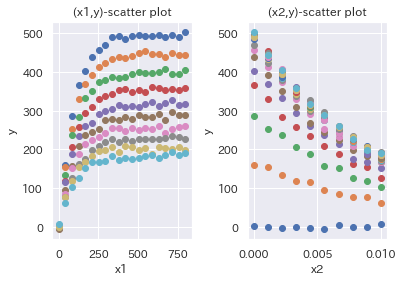

In [110]:
from mpl_toolkits import mplot3d

# 散布図の範囲情報の抽出
minx1 = np.min(x1)
maxx1 = np.max(x1)
rx1 = maxx1-minx1
cx1 = 0.5*rx1
minx2 = np.min(x2)
maxx2 = np.max(x2)
rx2 = maxx2-minx2
cx2 = 0.5*rx2

# 散布図の表示
fig, axs = plt.subplots(1, 2, figsize=(6,4))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
# (x1,y)
for irow in range(y.shape[0]):
    axs[0].scatter(x1[irow,:],y[irow,:])
axs[0].set_title('(x1,y)-scatter plot')
axs[0].set_xlabel('x1')
axs[0].set_ylabel('y')
# (x2,y)
for icol in range(y.shape[1]):
    axs[1].scatter(x2[:,icol],y[:,icol])
axs[1].set_title('(x2,y)-scatter plot')
axs[1].set_xlabel('x2')
axs[1].set_ylabel('y')
#
axs[0].grid(True)
axs[1].grid(True)
plt.show()




# 三次元散布図の描画


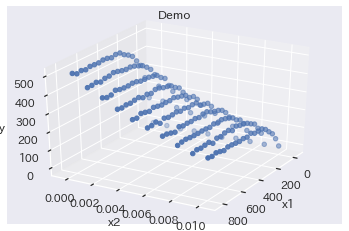

In [111]:

# 三次元散布図の表示
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x1,x2,y)
ax.set_title('Demo')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_xlim([minx1-0.1*rx1,maxx1+0.1*rx1])
ax.set_ylim([minx2-0.1*rx2,maxx2+0.1*rx2])
ax.view_init(elev=30,azim=30) # 見やすいように設定
ax.grid(True)
plt.show()

## 線形重回帰の実行

In [112]:
from sklearn.linear_model import LinearRegression

# 線形単回帰のインスタンス生成
regm = LinearRegression()

# 線形重回帰分析
Xdata = np.concatenate([x1.reshape(-1,1), x2.reshape(-1,1)],axis=1) # データ行列生成
ydata = y.reshape(-1,1) # 列ベクトル化
regm.fit(Xdata,ydata) # 最小２乗法

LinearRegression()

β0 = 304.81 
β1 =  0.25 
β2 = -26633.45 


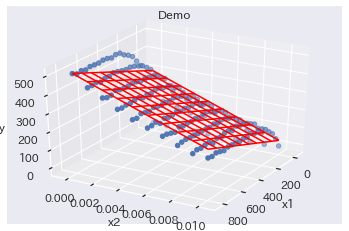

In [113]:
# 推定結果
beta0 = regm.intercept_[0]
beta1 = regm.coef_[0][0]
beta2 = regm.coef_[0][1]
print("β0 = {0:5.2f} ".format(beta0))
print("β1 = {0:5.2f} ".format(beta1))
print("β2 = {0:5.2f} ".format(beta2))

# 3次元散布図の表示
nPoints = 10
fig = plt.figure()
ax = plt.axes(projection='3d')
xfit1,xfit2 = np.meshgrid(np.linspace(minx1,maxx1,nPoints),
                          np.linspace(minx2,maxx2,nPoints))
Xfit  = np.concatenate([xfit1.reshape(-1,1),xfit2.reshape(-1,1)],axis=1)
yfit  = regm.predict(Xfit).reshape(xfit1.shape)
ax.scatter(x1,x2,y)
ax.plot_wireframe(xfit1,xfit2,yfit, color = 'red')
ax.set_title('Demo')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_xlim([minx1-0.1*rx1,maxx1+0.1*rx1])
ax.set_ylim([minx2-0.1*rx2,maxx2+0.1*rx2])
ax.view_init(elev=30,azim=30) # 見やすいように設定
ax.grid(True)
plt.show()

## 基底展開重回帰モデルのパラメータ数の選択


deg = 1: AIC = 2.23e+03 
deg = 2: AIC = 2.01e+03 
deg = 3: AIC = 1.71e+03 
deg = 4: AIC = 1.44e+03 
deg = 5: AIC = 1.40e+03 
deg = 6: AIC = 1.91e+03 
deg = 7: AIC = 2.22e+03 
deg = 8: AIC = 2.31e+03 
deg = 9: AIC = 2.39e+03 
deg = 10: AIC = 2.44e+03 


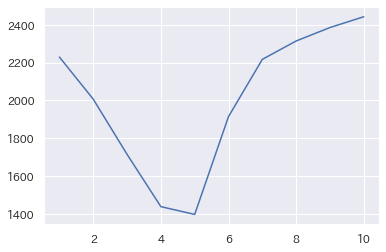

In [114]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

maxdeg = 10
deg = np.zeros(maxdeg,dtype=int)
aic = np.zeros(maxdeg)
regmp = [ [] for idx in range(maxdeg) ]
for idx in range(maxdeg):
    deg[idx] = idx+1
    # 基底展開重回帰のインスタンス生成
    regmp[idx] = make_pipeline(PolynomialFeatures(degree=deg[idx],include_bias=False),
                         LinearRegression())
    # 基底展開重回帰分析
    regmp[idx].fit(Xdata,ydata)

    # AIC
    ypred = regmp[idx].predict(Xdata)
    mse = mean_squared_error(y.reshape(-1,1),ypred)
    nCoefs = (deg[idx]+1)*(deg[idx]+2)/2 # (n+1)(n+2)/2
    aic[idx] = nSamples*np.log(2*np.pi*mse)+nSamples+2*(nCoefs+1)
    print("deg = {0:d}: AIC = {1:5.2e} ".format(deg[idx],aic[idx]))

# AICのプロット
fig, ax = plt.subplots()
ax.plot(deg,aic)
plt.show()


In [115]:
# 最小のAICを与える次数
degopt = deg[np.argmin(aic)]

# 最適な基底展開重回帰のインスタンス抽出
regmpopt = regmp[np.argmin(aic)]

# 多項式重回帰パラメータの数 
nCoefsOpt = (degopt+1)*(degopt+2)/2 # (n+1)(n+2)/2

β0 =  0.65 
β0 =  4.28 
β1 = -3.76 
β2 = -0.02 
β3 = -261.83 
β4 = -0.04 
β5 =  0.00 
β6 =  0.66 
β7 = -2.56 
β8 = -0.00 
β9 = -0.00 
β10 = -0.00 
β11 = 16.51 
β12 = -0.02 
β13 = -0.00 
β14 =  0.00 
β15 =  0.00 
β16 = -0.02 
β17 =  0.25 
β18 = -0.00 
β19 = -0.00 


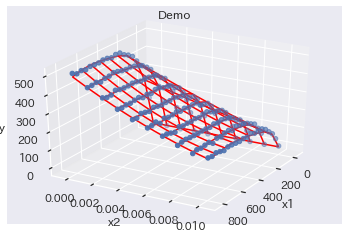

In [116]:
# 推定結果
beta0 = regmpopt[1].intercept_[0]
print("β0 = {0:5.2f} ".format(beta0))
for idx in range(0,nCoefsOpt.astype(int)-1):
    beta = regmpopt[1].coef_[0][idx]
    print("β{0:d} = {1:5.2f} ".format(idx,beta))

# 回帰曲面をプロット
fig = plt.figure()
ax = plt.axes(projection='3d')
yfit = regmpopt.predict(Xfit).reshape(xfit1.shape)
ax.scatter(x1,x2,y)
ax.plot_wireframe(xfit1,xfit2,yfit, color = 'red')
ax.set_title('Demo')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_xlim([minx1-0.1*rx1,maxx1+0.1*rx1])
ax.set_ylim([minx2-0.1*rx2,maxx2+0.1*rx2])
ax.view_init(elev=30,azim=30) # 見やすいように設定
ax.grid(True)
plt.show()